In [1]:
import numpy as np
import pandas as pd
#绘图
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#各种模型、数据处理方法

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.metrics import precision_score
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
import warnings
warnings.filterwarnings('ignore')


In [41]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [42]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


PassengerId => 乘客ID

Pclass => 乘客等级(1/2/3等舱位)

Name => 乘客姓名

Sex => 性别

Age => 年龄

SibSp => 堂兄弟/妹个数

Parch => 父母与小孩个数

Ticket => 船票信息

Fare => 票价

Cabin => 客舱

Embarked => 登船港口

In [43]:
train_df.Name.apply(lambda x: len(x))

0      23
1      51
2      22
3      44
4      24
5      16
6      23
7      30
8      49
9      35
10     31
11     24
12     30
13     27
14     36
15     32
16     20
17     28
18     55
19     23
20     20
21     21
22     27
23     28
24     29
25     57
26     23
27     30
28     29
29     19
       ..
861    27
862    51
863    33
864    22
865    24
866    28
867    36
868    27
869    31
870    17
871    48
872    24
873    27
874    37
875    32
876    29
877    20
878    18
879    45
880    44
881    18
882    28
883    29
884    22
885    36
886    21
887    28
888    40
889    21
890    19
Name: Name, Length: 891, dtype: int64

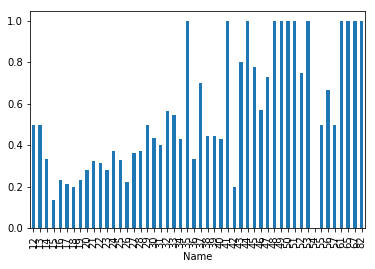

In [44]:
train_df.groupby(train_df.Name.apply(lambda x: len(x)))['Survived'].mean().plot(kind='bar')

In [45]:
combine_df = pd.concat([train_df,test_df])
combine_df['Name_Len'] = combine_df['Name'].apply(lambda x: len(x))
combine_df['Name_Len'] = pd.qcut(combine_df['Name_Len'],5)

In [46]:
train_c = train_df['Name'].apply(lambda x: x.split(', ')[1]).apply(lambda x: x.split('.')[0])
train_c.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Ms                1
Lady              1
Sir               1
Capt              1
Don               1
Mme               1
Jonkheer          1
the Countess      1
Name: Name, dtype: int64

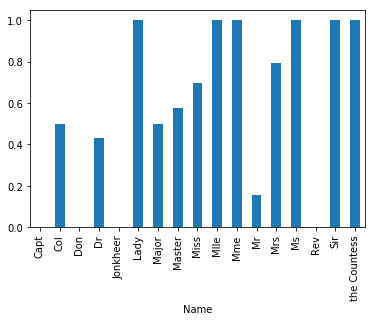

In [47]:
train_df.groupby(train_c)['Survived'].mean().plot(kind='bar')

In [48]:
train_df.groupby(train_c)['Survived'].mean()

Name
Capt            0.000000
Col             0.500000
Don             0.000000
Dr              0.428571
Jonkheer        0.000000
Lady            1.000000
Major           0.500000
Master          0.575000
Miss            0.697802
Mlle            1.000000
Mme             1.000000
Mr              0.156673
Mrs             0.792000
Ms              1.000000
Rev             0.000000
Sir             1.000000
the Countess    1.000000
Name: Survived, dtype: float64

In [49]:
combine_df['Title'] = combine_df['Name'].apply(lambda x: x.split(', ')[1]).apply(lambda x: x.split('.')[0])
combine_df['Title'] = combine_df['Title'].replace(['Don', 'Dona', 'Capt', 'Jonkheer', 'Rev'],'Mr')
combine_df['Title'] = combine_df['Title'].replace(['Major', 'Col','Master','Dr','Sir'],'Postedman')
combine_df['Title'] = combine_df['Title'].replace(['Mlle','Ms'], 'Miss')
combine_df['Title'] = combine_df['Title'].replace(['the Countess','Mme','Lady'], 'Mrs')
df = pd.get_dummies(combine_df['Title'],prefix='Title')
combine_df = pd.concat([combine_df,df],axis=1)

In [50]:
train_df.Ticket.value_counts()

CA. 2343           7
1601               7
347082             7
347088             6
CA 2144            6
3101295            6
382652             5
S.O.C. 14879       5
2666               4
W./C. 6608         4
4133               4
113760             4
17421              4
349909             4
LINE               4
347077             4
19950              4
113781             4
PC 17757           4
29106              3
PC 17572           3
F.C.C. 13529       3
110413             3
248727             3
371110             3
345773             3
C.A. 34651         3
13502              3
347742             3
239853             3
                  ..
112379             1
370375             1
234686             1
PC 17754           1
392092             1
323592             1
113787             1
SOTON/OQ 392089    1
PC 17610           1
65303              1
16988              1
323951             1
112053             1
13568              1
C.A. 18723         1
36209              1
347464       

Ticket  Survived
1       0           384
        1           163
2       1           108
        0            80
3       1            44
        0            19
4       0            22
        1            22
5       0            10
6       0            18
7       0            16
        1             5
Name: Survived, dtype: int64

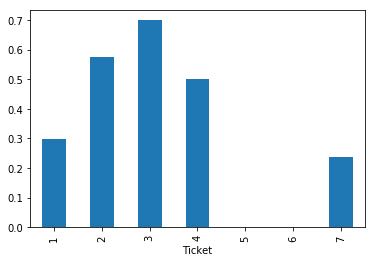

In [51]:
T_group=train_df.groupby(train_df.Ticket.apply(lambda x: train_df.Ticket.value_counts()[x]))['Survived']
T_group.mean().plot(kind = 'bar')
T_group.value_counts()

Ticket  Survived
1       1            92
        0            54
2       0            98
        1            85
3       0           229
        1            72
4       0             8
        1             2
5       0             3
6       0             5
        1             1
7       0             8
        1             1
8       0             2
9       1             1
A       0            27
        1             2
C       0            31
        1            16
F       1             4
        0             3
L       0             3
        1             1
P       1            42
        0            23
S       0            44
        1            21
W       0            11
        1             2
Name: Survived, dtype: int64

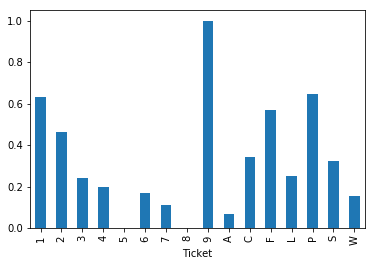

In [52]:
TL_group=train_df.groupby(train_df.Ticket.apply(lambda x: str(x)[0]))['Survived']
TL_group.mean().plot(kind = 'bar')
TL_group.value_counts()

In [53]:
train_df['Familysize'] = train_df['SibSp']+train_df['Parch']
g_f = train_df.groupby(train_df['Familysize'])['Survived']
g_f.value_counts()

Familysize  Survived
0           0           374
            1           163
1           1            89
            0            72
2           1            59
            0            43
3           1            21
            0             8
4           0            12
            1             3
5           0            19
            1             3
6           0             8
            1             4
7           0             6
10          0             7
Name: Survived, dtype: int64

In [54]:
train_df['Age'] = pd.cut(train_df['Age'],5)

In [55]:
g_age = train_df[['Age','Survived']].groupby(train_df.Age)
g_age['Survived'].mean()

Age
(0.34, 16.336]      0.550000
(16.336, 32.252]    0.369942
(32.252, 48.168]    0.404255
(48.168, 64.084]    0.434783
(64.084, 80.0]      0.090909
Name: Survived, dtype: float64

In [56]:
g_age['Survived'].value_counts()

Age               Survived
(0.34, 16.336]    1            55
                  0            45
(16.336, 32.252]  0           218
                  1           128
(32.252, 48.168]  0           112
                  1            76
(48.168, 64.084]  0            39
                  1            30
(64.084, 80.0]    0            10
                  1             1
Name: Survived, dtype: int64

In [57]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 18 columns):
Age                1046 non-null float64
Cabin              295 non-null object
Embarked           1307 non-null object
Fare               1308 non-null float64
Name               1309 non-null object
Parch              1309 non-null int64
PassengerId        1309 non-null int64
Pclass             1309 non-null int64
Sex                1309 non-null object
SibSp              1309 non-null int64
Survived           891 non-null float64
Ticket             1309 non-null object
Name_Len           1309 non-null category
Title              1309 non-null object
Title_Miss         1309 non-null uint8
Title_Mr           1309 non-null uint8
Title_Mrs          1309 non-null uint8
Title_Postedman    1309 non-null uint8
dtypes: category(1), float64(3), int64(4), object(6), uint8(4)
memory usage: 149.6+ KB


In [58]:
# 这两组数据都能显著影响到Survived，但是影响方式不完全相同
# 将这两项合并成FamilySize组的同时保留这两项。
combine_df['Familysize'] = combine_df['SibSp']+combine_df['Parch']

In [59]:
combine_df['Fname'] = combine_df['Name'].apply(lambda x:x.split(',')[0])
dead_female_Fname = list(set(combine_df[(combine_df.Sex=='female') & (combine_df.Age>=12)
                              & (combine_df.Survived==0) & (combine_df.Familysize>1)]['Fname'].values))
survive_male_Fname = list(set(combine_df[(combine_df.Sex=='male') & (combine_df.Age>=12)
                              & (combine_df.Survived==1) & (combine_df.Familysize>1)]['Fname'].values))
combine_df['Dead_female_family'] = np.where(combine_df['Fname'].isin(dead_female_Fname),1,0)
combine_df['Survive_male_family'] = np.where(combine_df['Fname'].isin(survive_male_Fname),1,0)
combine_df = combine_df.drop(['Name','Fname'],axis=1)

In [60]:
group = combine_df.groupby(['Title', 'Pclass'])['Age']
combine_df['Age'] = group.transform(lambda x: x.fillna(x.median()))
combine_df = combine_df.drop('Title',axis=1)

combine_df['IsChild'] = np.where(combine_df['Age']<=12,1,0)
combine_df['IsOld'] = np.where(combine_df['Age']>=60,1,0)
#combine_df['Age'] = pd.cut(combine_df['Age'],5)
combine_df = combine_df.drop('Age',axis=1)

In [61]:
combine_df['Ticket_Lett'] = combine_df['Ticket'].apply(lambda x: str(x)[0])
combine_df['Ticket_Lett'] = combine_df['Ticket_Lett'].apply(lambda x: str(x))

combine_df['High_Survival_Ticket'] = np.where(combine_df['Ticket_Lett'].isin(['1', '2', 'P']),1,0)
combine_df['Low_Survival_Ticket'] = np.where(combine_df['Ticket_Lett'].isin(['3','4','6','W','A','7']),1,0)
combine_df = combine_df.drop(['Ticket','Ticket_Lett'],axis=1)

In [62]:
combine_df['Familysize'] = np.where(combine_df['Familysize']==0, 'solo',
                                    np.where(combine_df['Familysize']<=3, 'normal', 'big'))
df = pd.get_dummies(combine_df['Familysize'],prefix='Familysize')
#combine_df = pd.concat([combine_df,df],axis=1).drop(['SibSp','Parch','Familysize'])
combine_df = pd.concat([combine_df,df],axis=1).drop('Familysize',axis=1)

In [63]:
combine_df.Embarked = combine_df.Embarked.fillna('S')
df = pd.get_dummies(combine_df['Embarked'],prefix='Embarked')
combine_df = pd.concat([combine_df,df],axis=1).drop('Embarked',axis=1)

In [64]:
combine_df['Cabin_isNull'] = np.where(combine_df['Cabin'].isnull(),0,1)
combine_df = combine_df.drop('Cabin',axis=1)

In [65]:
df = pd.get_dummies(combine_df['Pclass'],prefix='Pclass')
combine_df = pd.concat([combine_df,df],axis=1).drop('Pclass',axis=1)

In [66]:
df = pd.get_dummies(combine_df['Sex'],prefix='Sex')
combine_df = pd.concat([combine_df,df],axis=1).drop('Sex',axis=1)

In [67]:
combine_df['Fare'] = pd.qcut(combine_df.Fare,3)
df = pd.get_dummies(combine_df.Fare,prefix='Fare').drop('Fare_(-0.001, 8.662]',axis=1)
combine_df = pd.concat([combine_df,df],axis=1).drop('Fare',axis=1)

In [68]:
combine_df.describe()

,Parch,PassengerId,SibSp,Survived,Title_Miss,Title_Mr,Title_Mrs,Title_Postedman,Dead_female_family,Survive_male_family,...,Embarked_Q,Embarked_S,Cabin_isNull,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,"Fare_(8.662, 26.0]","Fare_(26.0, 512.329]"
count,1309.000000,1309.000000,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,...,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.385027,655.000000,0.498854,0.383838,0.201681,0.587471,0.152788,0.058060,0.055004,0.014515,...,0.093965,0.699771,0.225363,0.246753,0.211612,0.541635,0.355997,0.644003,0.326967,0.325439
std,0.865560,378.020061,1.041658,0.486592,0.401408,0.492477,0.359921,0.233945,0.228075,0.119646,...,0.291891,0.458533,0.417981,0.431287,0.408607,0.498454,0.478997,0.478997,0.469284,0.468718
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,328.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,655.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,982.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,9.000000,1309.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
# 所有特征转化成数值型编码
features = combine_df.drop(["PassengerId","Survived"], axis=1).columns
le = LabelEncoder()
for feature in features:
    le = le.fit(combine_df[feature])
    combine_df[feature] = le.transform(combine_df[feature])

In [71]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 29 columns):
Parch                   1309 non-null int64
PassengerId             1309 non-null int64
SibSp                   1309 non-null int64
Survived                891 non-null float64
Name_Len                1309 non-null int64
Title_Miss              1309 non-null int64
Title_Mr                1309 non-null int64
Title_Mrs               1309 non-null int64
Title_Postedman         1309 non-null int64
Dead_female_family      1309 non-null int64
Survive_male_family     1309 non-null int64
IsChild                 1309 non-null int64
IsOld                   1309 non-null int64
High_Survival_Ticket    1309 non-null int64
Low_Survival_Ticket     1309 non-null int64
Familysize_big          1309 non-null int64
Familysize_normal       1309 non-null int64
Familysize_solo         1309 non-null int64
Embarked_C              1309 non-null int64
Embarked_Q              1309 non-null int64
Embarked_S   

In [72]:
X_train = combine_df.iloc[:891,:].drop(["PassengerId","Survived"], axis=1)
Y_train = combine_df.iloc[:891,:]["Survived"]
X_test = combine_df.iloc[891:,:].drop(["PassengerId","Survived"], axis=1)

In [73]:
random_forest = RandomForestClassifier(n_estimators=250, max_depth=5, criterion='gini')
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)

In [74]:
result = pd.DataFrame({'PassengerId':test_df['PassengerId'].as_matrix(), 'Survived':Y_pred.astype(np.int32)})
#result.to_csv("logistic_regression_predictions.csv", index=False)
result.to_csv("RF_predictions.csv", index=False)

In [75]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

# Support Vector Machines
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)

#  k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

#Gradient Boost
gbdt = GradientBoostingClassifier(n_estimators=500,learning_rate=0.03,max_depth=3)
gbdt.fit(X_train, Y_train)
Y_pred = gbdt.predict(X_test)
gbdt.score(X_train, Y_train)
acc_gbdt = round(gbdt.score(X_train, Y_train) * 100, 2)


models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree','Gradient Boost'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, 
              acc_sgd, acc_linear_svc, acc_decision_tree,
             acc_gbdt]})
print(models.sort_values(by='Score', ascending=False))

                        Model  Score
3               Random Forest  92.70
7               Decision Tree  92.70
8              Gradient Boost  88.78
1                         KNN  86.98
2         Logistic Regression  85.86
6                  Linear SVC  85.52
0     Support Vector Machines  84.29
4                 Naive Bayes  84.18
5  Stochastic Gradient Decent  84.18


In [76]:
features = pd.DataFrame()
features['Feature'] = X_train.columns
features['importance'] = random_forest.feature_importances_
print(features)

                 Feature  importance
0                  Parch    0.026472
1                  SibSp    0.033585
2               Name_Len    0.128405
3             Title_Miss    0.033660
4               Title_Mr    0.125858
5              Title_Mrs    0.036399
6        Title_Postedman    0.010147
7     Dead_female_family    0.058762
8    Survive_male_family    0.013277
9                IsChild    0.020062
10                 IsOld    0.009438
11  High_Survival_Ticket    0.036486
12   Low_Survival_Ticket    0.027702
13        Familysize_big    0.020405
14     Familysize_normal    0.020581
15       Familysize_solo    0.011663
16            Embarked_C    0.012541
17            Embarked_Q    0.009103
18            Embarked_S    0.019887
19          Cabin_isNull    0.036662
20              Pclass_1    0.024130
21              Pclass_2    0.014731
22              Pclass_3    0.042491
23            Sex_female    0.090380
24              Sex_male    0.089928
25    Fare_(8.662, 26.0]    0.019918
2

In [77]:
forest = RandomForestClassifier(max_features='sqrt')
parameter_grid = {
                 'max_depth' : [5,6,7,8,9,10,11],
                 'n_estimators': [100,200,250,300],
                 'criterion': ['gini','entropy']
                 }
cross_validation = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
grid_search = GridSearchCV(forest,
                           param_grid=parameter_grid,
                           cv=cross_validation)
grid_search.fit(X_train, Y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))#300 8

Best score: 0.8540965207631874
Best parameters: {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 300}


In [78]:

random_forest = RandomForestClassifier(n_estimators=300, max_depth=8, criterion='gini')
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)#300 8 0.80382

Y_pred.shape

(418,)

In [79]:
result = pd.DataFrame({'PassengerId':test_df['PassengerId'].as_matrix(), 'Survived':Y_pred.astype(np.int32)})
#result.to_csv("predictions.csv", index=False)
result.to_csv("RF_predictions.csv", index=False)

In [80]:
def plot_learning_curve(clf, title, X, y, ylim=None, cv=None, n_jobs=3, train_sizes=np.linspace(.05, 1., 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        clf, X, y, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    ax = plt.figure().add_subplot(111)
    ax.set_title(title)
    if ylim is not None:
        ax.ylim(*ylim)
    ax.set_xlabel(u"train_num_of_samples")
    ax.set_ylabel(u"score")

    ax.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                     alpha=0.1, color="b")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                     alpha=0.1, color="r")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"train score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"testCV score")

    ax.legend(loc="best")

    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff


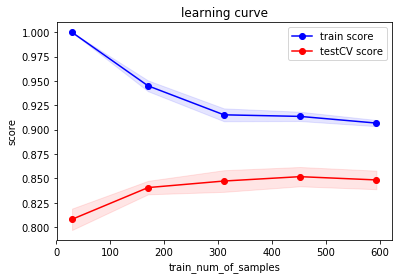

In [81]:
clf = RandomForestClassifier(n_estimators=300, max_depth=8, criterion='entropy')
plot_learning_curve(clf, u"learning curve",X_train, Y_train)
plt.show()

Stacking

In [54]:
type(X_train)

pandas.core.frame.DataFrame

In [55]:
#test enumerate
X = np.arange(24).reshape(12,2)  
y = np.random.choice([1,2],12,p=[0.4,0.6])  
kf = KFold(n_splits=5,shuffle=False)  
for i,(train_index , test_index) in list(enumerate(kf.split(X))):  
    print('i:%s ,train_index:%s , test_index: %s ' %(i,train_index,test_index))

i:0 ,train_index:[ 3  4  5  6  7  8  9 10 11] , test_index: [0 1 2] 
i:1 ,train_index:[ 0  1  2  6  7  8  9 10 11] , test_index: [3 4 5] 
i:2 ,train_index:[ 0  1  2  3  4  5  8  9 10 11] , test_index: [6 7] 
i:3 ,train_index:[ 0  1  2  3  4  5  6  7 10 11] , test_index: [8 9] 
i:4 ,train_index:[0 1 2 3 4 5 6 7 8 9] , test_index: [10 11] 


In [82]:
# stacking

NFOLDS = 3
ntrain = X_train.shape[0] # 891
ntest = X_test.shape[0]  # 418
kf = KFold(n_splits = NFOLDS, random_state = None)
'''clfs = [ RandomForestClassifier(n_estimators=300, max_depth=8, criterion='entropy'),
        GradientBoostingClassifier(n_estimators=500,learning_rate=0.03,max_depth=3),
        KNeighborsClassifier(n_neighbors = 3)]'''

clf = RandomForestClassifier(n_estimators=300, max_depth=8, criterion='entropy')

# get_oof仅支持单一子模型
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))  # 1*891  
    oof_test = np.zeros((ntest,))    # 1*418
    oof_test_skf = np.empty((NFOLDS, ntest))  # 5*418 (NFOLDS行，ntest列的二维array)
    for i,(train_index , test_index) in list(enumerate(kf.split(x_train))):   #循环NFOLDS次
        x_tr = x_train.iloc[train_index,]
        y_tr = y_train.iloc[train_index,]
        x_te = x_train.iloc[test_index,]
        #print(len(train_index),len(test_index))
        #clf = clfs[i]
        clf.fit(x_tr, y_tr)
        
        oof_train[test_index] = clf.predict(x_te)
        #print(oof_train.shape)
        
        oof_test_skf[i, :] = clf.predict(x_test)  #固定行填充，循环一次，填充一行
        #print(oof_test_skf.shape)
    oof_test[:] = oof_test_skf.mean(axis=0)  #axis=0,按列求平均，最后保留一行
    
    '''print('\n\n')
    print(oof_test.shape)
    print(oof_train.reshape(-1, 1).shape)
    print(oof_test.reshape(-1, 1).shape)'''
    
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)  #转置，从一行变为一列
# oof_train.reshape(-1, 1):891*1 oof_test.reshape(-1, 1):418*1




In [83]:
# Put in our parameters for said classifiers
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':500,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 500,
     #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}

# Support Vector Classifier parameters 
svc_params = {
    'kernel' : 'linear',
    'C' : 0.025
    }

In [84]:
# Create 5 objects that represent our 4 models
rf = RandomForestClassifier(**rf_params)
#rf = RandomForestClassifier(n_estimators=300, max_depth=8, criterion='entropy')
et = ExtraTreesClassifier(**et_params)
ada = AdaBoostClassifier(**ada_params)
gb = GradientBoostingClassifier(**gb_params)
svc = SVC(**svc_params)

In [85]:


# Create our OOF train and test predictions. These base results will be used as new features
et_oof_train, et_oof_test = get_oof(et, X_train, Y_train, X_test) # Extra Trees
rf_oof_train, rf_oof_test = get_oof(rf,X_train, Y_train, X_test) # Random Forest
ada_oof_train, ada_oof_test = get_oof(ada, X_train, Y_train, X_test) # AdaBoost 
gb_oof_train, gb_oof_test = get_oof(gb,X_train, Y_train, X_test) # Gradient Boost
svc_oof_train, svc_oof_test = get_oof(svc,X_train, Y_train, X_test) # Support Vector Classifier

print("Training is complete")

Training is complete


clf1:Extra Trees  score: 84.29
clf1:Random Forest  score: 86.64
clf1:AdaBoost  score: 82.94
clf1:GBDT score: 82.94
clf1:SVC  score: 82.15


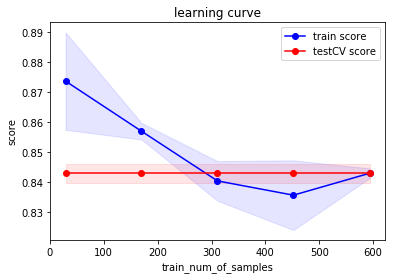

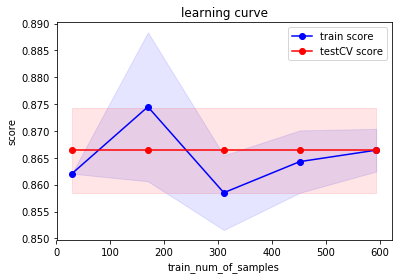

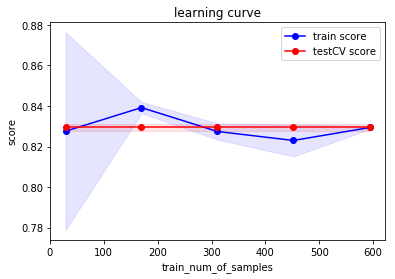

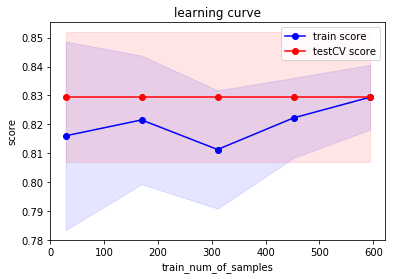

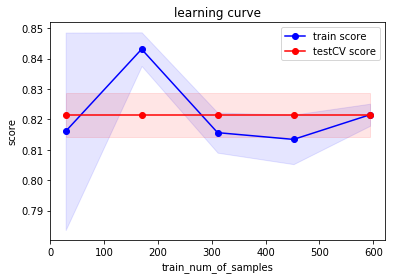

In [86]:
clf2 = gb


clf2.fit(et_oof_train, Y_train)
print('clf1:Extra Trees  score:',round(clf2.score(et_oof_train, Y_train) * 100, 2))
plot_learning_curve(clf2, u"learning curve",et_oof_train, Y_train)

clf2.fit(rf_oof_train, Y_train)
print('clf1:Random Forest  score:',round(clf2.score(rf_oof_train, Y_train) * 100, 2))
plot_learning_curve(clf2, u"learning curve",rf_oof_train, Y_train)

clf2.fit(ada_oof_train, Y_train)
print('clf1:AdaBoost  score:',round(clf2.score(ada_oof_train, Y_train) * 100, 2))
plot_learning_curve(clf2, u"learning curve",ada_oof_train, Y_train)

clf2.fit(gb_oof_train, Y_train)
print('clf1:GBDT score:',round(clf2.score(gb_oof_train, Y_train) * 100, 2))
plot_learning_curve(clf2, u"learning curve",gb_oof_train, Y_train)

clf2.fit(svc_oof_train, Y_train)
print('clf1:SVC  score:',round(clf2.score(svc_oof_train, Y_train) * 100, 2))
plot_learning_curve(clf2, u"learning curve",svc_oof_train, Y_train)


plt.show()

In [87]:
Y_pred = clf2.predict(rf_oof_test)
result = pd.DataFrame({'PassengerId':test_df['PassengerId'].as_matrix(), 'Survived':Y_pred.astype(np.int32)})
#result.to_csv("predictions.csv", index=False)
result.to_csv("Stacking_predictions.csv", index=False)

In [159]:
# 调参

'''forest = RandomForestClassifier(max_features='sqrt')
parameter_grid = {
                 'max_depth' : [5,6,7,8,9,10,11],
                 'n_estimators': [100,200,250,300],
                 'criterion': ['gini','entropy']
                 }'''
gbdt = GradientBoostingClassifier()
# Gradient Boosting parameters
parameter_grid = {
    'n_estimators': [100,200,250,300,400,500],
     #'max_features': 0.2,
    'max_depth': [5,6,7,8,9,10,11],
    'min_samples_leaf': [2],
}
cross_validation = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
grid_search = GridSearchCV(gbdt,
                           param_grid=parameter_grid,
                           cv=cross_validation)
grid_search.fit(rf_oof_train, Y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))#

Best score: 0.8709315375982043
Best parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 100}


87.09


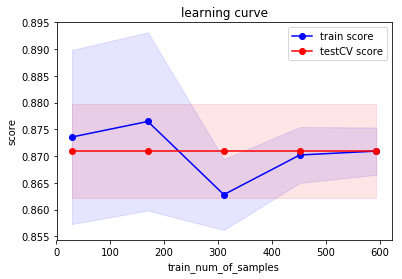

In [160]:
# Gradient Boosting parameters
gb_params = {
    'n_estimators': 100,
     #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}
gbdt = GradientBoostingClassifier(**gb_params)

#gbdt = GradientBoostingClassifier(n_estimators=500,learning_rate=0.03,max_depth=3)
clf2= gbdt
#clf2= logreg
clf2.fit(rf_oof_train, Y_train)
print(round(clf2.score(rf_oof_train, Y_train) * 100, 2))
plot_learning_curve(clf2, u"learning curve",rf_oof_train, Y_train)
plt.show()

In [58]:
Y_pred = clf2.predict(rf_oof_test)
result = pd.DataFrame({'PassengerId':test_df['PassengerId'].as_matrix(), 'Survived':Y_pred.astype(np.int32)})
#result.to_csv("predictions.csv", index=False)
result.to_csv("Stacking_predictions.csv", index=False)# 0.80382

Xgboost作为第二层模型

Xgboot适合特征维度较高的数据，将第一层得到的测试和训练集合并用以训练和预测

In [161]:
x_train = np.concatenate(( et_oof_train, rf_oof_train, ada_oof_train, gb_oof_train, svc_oof_train), axis=1)
x_test = np.concatenate(( et_oof_test, rf_oof_test, ada_oof_test, gb_oof_test, svc_oof_test), axis=1)

87.09


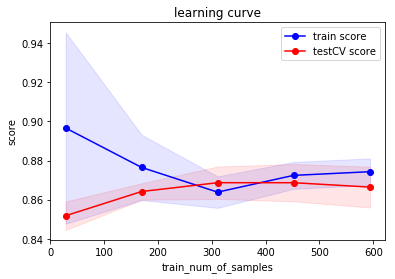

In [162]:
gbm = xgb.XGBClassifier(
    #learning_rate = 0.02,
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(x_train, Y_train)
print(round(gbm.score(x_train, Y_train) * 100, 2))
plot_learning_curve(gbm, u"learning curve",x_train, Y_train)


plt.show()

In [76]:
Y_pred = gbm.predict(x_test)
result = pd.DataFrame({'PassengerId':test_df['PassengerId'].as_matrix(), 'Survived':Y_pred.astype(np.int32)})
#result.to_csv("predictions.csv", index=False)
result.to_csv("Stacking_predictions_xgb.csv", index=False) #0.79904

Stacking：尝试多种子模型

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone


class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [42]:
stacked_averaged_models = StackingAveragedModels(base_models = (rf, et, ada, gb, svc),
                                                 meta_model = logreg)

stacked_averaged_models.fit(X_train.values,Y_train)
stacked_pred = stacked_averaged_models.predict(X_test)
Y_pred = stacked_pred
result = pd.DataFrame({'PassengerId':test_df['PassengerId'].as_matrix(), 'Survived':Y_pred.astype(np.int32)})
result.to_csv("stacked_averaged_models_predictions.csv", index=False) # 79.425

Stacking不work 可能的原因：


  子模型中有明显逊色的模型

  子模型种类不够丰富

  数据集太小，stacking不一定有效
